In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
#dataset do Kaggle de análise de estrelas
#https://www.kaggle.com/deepu1109/star-dataset
dataset = "https://raw.githubusercontent.com/Leovsimoes/ReconhecimentoDePadroes/main/6%20class%20csv.csv"
df = pd.read_csv(dataset)

In [3]:
#listagem das colunas
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [4]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [6]:
#rodando o modelo pela primeira vez para entender os atributos e o MSE
#para esse modelo serão selecionadas todas as variáveis numéricas
X = df.drop(['Star type','Spectral Class','Star color'],axis=1)

#o target é o star type, que possui 6 vlassificações distintas
y = df['Star type']

model = LogisticRegression()
model.fit(X,y)
ypred = model.predict(X)
mse = mean_squared_error(y,ypred)

print('MSE: '+str(mse))
print('Coef: '+str(model.coef_))
print('Intercept: '+str(model.intercept_))

MSE: 0.9208333333333333
Coef: [[ 5.87767017e-04 -2.18333676e-03 -7.06877765e-06  1.30538703e-04]
 [ 6.18866506e-04 -2.18960136e-03 -4.08802716e-06  5.69956086e-05]
 [ 7.33306527e-04 -2.45369448e-03 -1.31217421e-05 -8.92112524e-05]
 [ 5.99812592e-04  2.07925558e-03 -3.40054311e-05 -8.90261463e-05]
 [-1.25805458e-03  2.37742003e-03 -2.82133642e-03 -5.90170358e-06]
 [-1.28169806e-03  2.36995699e-03  2.87962040e-03 -3.39520933e-06]]
Intercept: [ 5.49506574e-06  4.98812045e-06 -7.72077362e-06 -2.35847332e-06
  9.88346322e-07 -1.39228557e-06]


D:\amdskit\dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


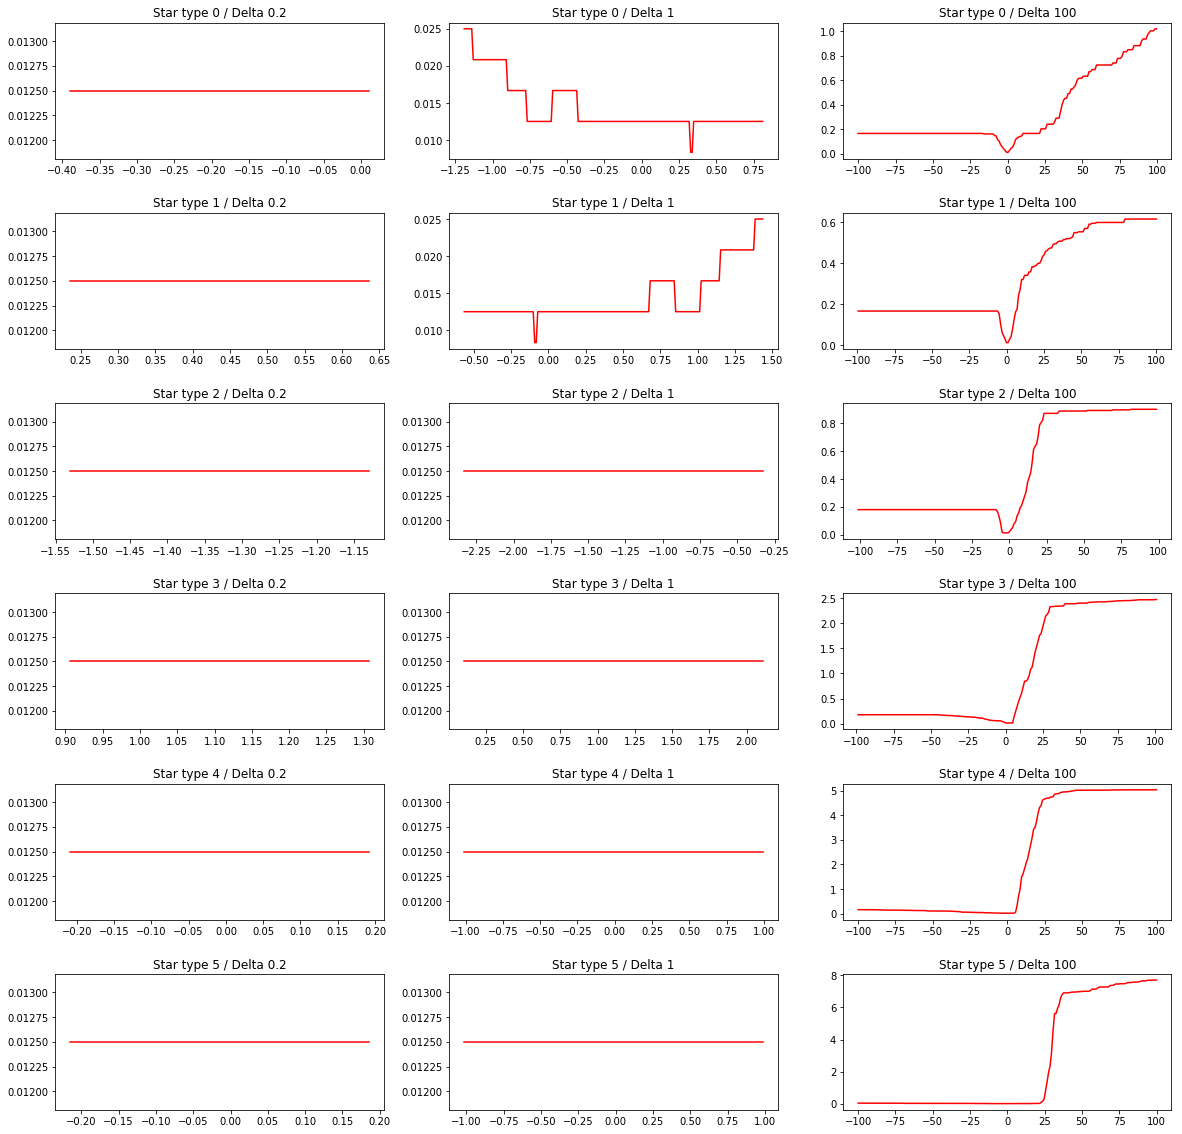

In [7]:
#para o problema de classificação serão escolhidos inicialmente 3 deltas de proporções diferentes
delta = [0.2,1,100]

#armazenando os valores unicos do target
clas = df['Star type'].unique()

#gerando a figura com os subplots
fig, axs = plt.subplots(len(clas), len(delta), figsize=(20,20))
fig.subplots_adjust(hspace=0.4)

#nesse for foi feito o produto cartesiano do tipo de estrela x delta, zipado com o produto cartesiano dos eixos da figura
for element in zip(itertools.product(clas,delta),itertools.product(np.arange(len(clas)),np.arange(len(delta)))):

    X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
    y = df['Star type']

    #rodando o modelo pela primeira vez na célula anterior foi gerado um warning dizendo que pelo número de iterações padrão (100) o modelo não está convergindo, por isso aumentei o parâmetro max_iter
    model = LogisticRegression(max_iter=4000)
    #model = LogisticRegression()
    model.fit(X,y)

    intercepts = np.linspace(model.intercept_[element[0][0]]-element[0][1],model.intercept_[element[0][0]]+element[0][1],200)
    mses = []

    for i in intercepts:
        model.intercept_[element[0][0]] = i
        new_ypred = model.predict(X)
        mses.append(mean_squared_error(y,new_ypred))

    axs[element[1]].plot(intercepts,mses,'-r')
    axs[element[1]].set_title('Star type '+str(element[0][0])+' / Delta '+str(element[0][1]))

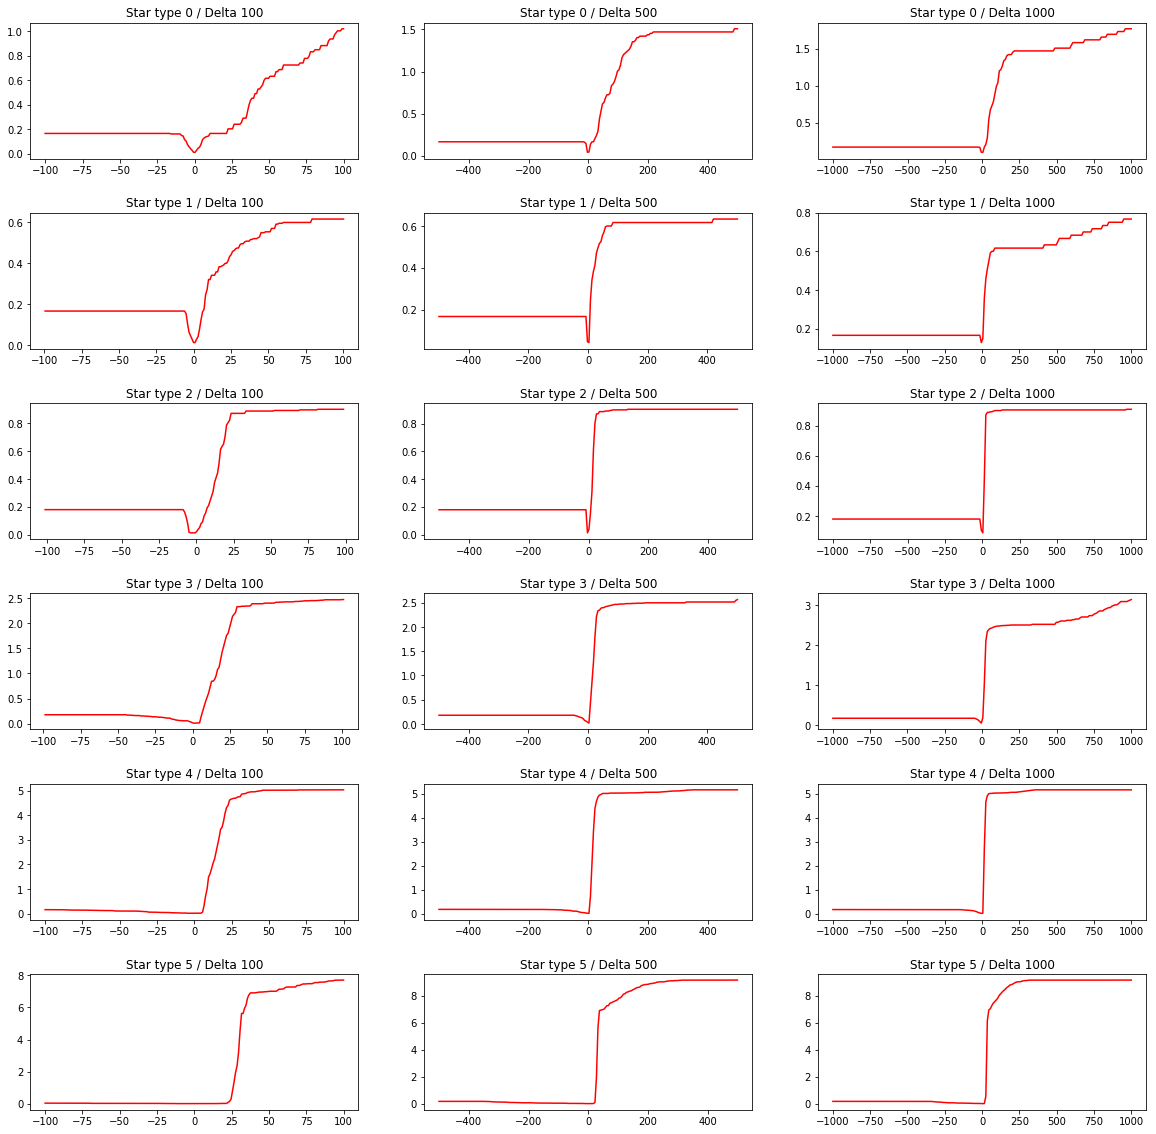

In [8]:
#para deltas pequenos como 0.2 e 1, os valores do intercept convergiram para uma reta. Vamos alterar a partir de 100, 500 e 1.000 para avaliar o novo resultado
delta = [100,500,1000]
clas = df['Star type'].unique()

fig, axs = plt.subplots(len(clas), len(delta), figsize=(20,20))
fig.subplots_adjust(hspace=0.4)

for element in zip(itertools.product(clas,delta),itertools.product(np.arange(len(clas)),np.arange(len(delta)))):

    X = df.drop(['Star type','Spectral Class','Star color'],axis=1)
    y = df['Star type']
    model = LogisticRegression(max_iter=4000)
    model.fit(X,y)

    intercepts = np.linspace(model.intercept_[element[0][0]]-element[0][1],model.intercept_[element[0][0]]+element[0][1],200)
    mses = []

    for i in intercepts:
        model.intercept_[element[0][0]] = i
        new_ypred = model.predict(X)
        mses.append(mean_squared_error(y,new_ypred))

    axs[element[1]].plot(intercepts,mses,'-r')
    axs[element[1]].set_title('Star type '+str(element[0][0])+' / Delta '+str(element[0][1]))